In [2]:
import pandas as pd
import numpy as np

## Importing the data

In [3]:
data_path = '../data/raw/chordonomicon.csv'

In [4]:
df = pd.read_csv(data_path)

/var/folders/ln/8s8rnz7s3pv6jwy7khy_32yw0000gn/T/ipykernel_87670/606058143.py:1: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [5]:
df.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,NaN,'classic country pop',NaN,NaN,artist_1,pop,NaN,4AIEGdwDzPELXYgM5JaEY5
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,2003-01-01,'alternative metal' 'alternative rock' 'nu met...,2000.0,pop rock,artist_2,metal,2ffJZ2r8HxI5DHcmf3BO6c,694QW15WkebjcrWgQHzRYF
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,2003-01-01,'alternative metal' 'canadian rock' 'funk meta...,2000.0,canadian rock,artist_3,metal,5KiY8SZEnvCPyIEkFGRR3y,0niJkG4tKkne3zwr7I8n9n
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,2022-09-23,NaN,2020.0,NaN,artist_4,NaN,01TtAcUqyLCRBZq4ZZiQWS,17BfKBemmMGO5ZAK25wraW
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,2023-02-10,'modern country pop',2020.0,NaN,artist_5,pop,3zUecdrWC3IqrNSjhnoF3G,4GGfAshSkqoxpZdoaHm7ky


In [6]:
df.shape

(679807, 10)

In [7]:
df.columns

Index(['id', 'chords', 'release_date', 'genres', 'decade', 'rock_genre',
       'artist_id', 'main_genre', 'spotify_song_id', 'spotify_artist_id'],
      dtype='object')

In [8]:
for col in df.columns:
    print(f"{col}: {df[col].apply(type).value_counts()}")

id: id
<class 'int'>    679807
Name: count, dtype: int64
chords: chords
<class 'str'>    679807
Name: count, dtype: int64
release_date: release_date
<class 'str'>      422181
<class 'float'>    257626
Name: count, dtype: int64
genres: genres
<class 'str'>      429753
<class 'float'>    250054
Name: count, dtype: int64
decade: decade
<class 'float'>    679807
Name: count, dtype: int64
rock_genre: rock_genre
<class 'float'>    534589
<class 'str'>      145218
Name: count, dtype: int64
artist_id: artist_id
<class 'str'>      510986
<class 'float'>    168821
Name: count, dtype: int64
main_genre: main_genre
<class 'str'>      352111
<class 'float'>    327696
Name: count, dtype: int64
spotify_song_id: spotify_song_id
<class 'str'>      440284
<class 'float'>    239523
Name: count, dtype: int64
spotify_artist_id: spotify_artist_id
<class 'str'>      510986
<class 'float'>    168821
Name: count, dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679807 entries, 0 to 679806
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 679807 non-null  int64  
 1   chords             679807 non-null  object 
 2   release_date       422181 non-null  object 
 3   genres             429753 non-null  object 
 4   decade             422181 non-null  float64
 5   rock_genre         145218 non-null  object 
 6   artist_id          510986 non-null  object 
 7   main_genre         352111 non-null  object 
 8   spotify_song_id    440284 non-null  object 
 9   spotify_artist_id  510986 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 51.9+ MB


## Looking for `missing` data

In [10]:
import missingno as mno

In [11]:
missing_values = df.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

Missing values in each column:
id                        0
chords                    0
release_date         257626
genres               250054
decade               257626
rock_genre           534589
artist_id            168821
main_genre           327696
spotify_song_id      239523
spotify_artist_id    168821
dtype: int64


In [12]:
missing_values_percentage = missing_values / len(df) * 100
missing_values_percentage

id                    0.000000
chords                0.000000
release_date         37.896933
genres               36.783087
decade               37.896933
rock_genre           78.638349
artist_id            24.833666
main_genre           48.204270
spotify_song_id      35.233971
spotify_artist_id    24.833666
dtype: float64

In [13]:
total_cells = np.prod(df.shape)
total_missing = missing_values.sum()

total_missing_percentage = (total_missing/total_cells) * 100
print(f'Total percentage of data missing in the dataset: {total_missing_percentage:.2f}%')

Total percentage of data missing in the dataset: 32.43%


In [14]:
import matplotlib.pyplot as plt

<Axes: >

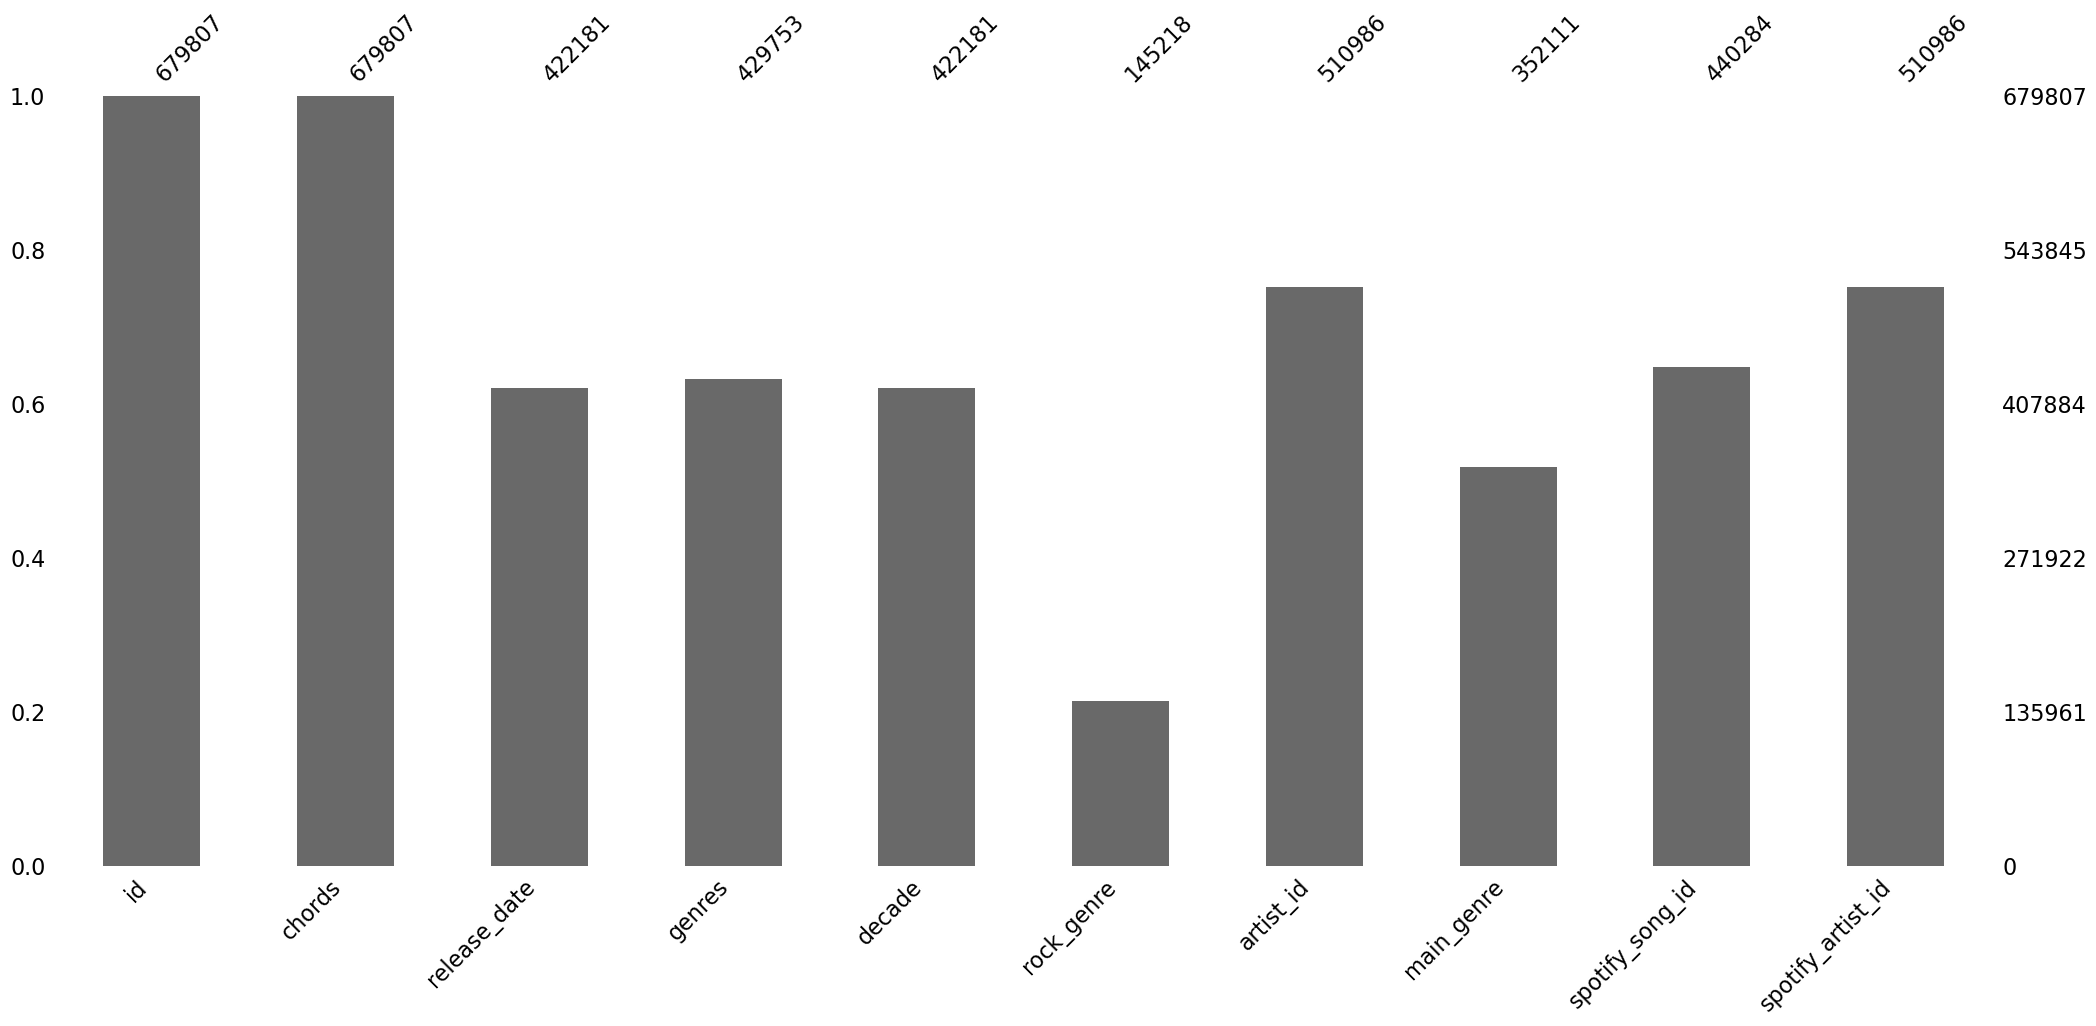

In [15]:
mno.bar(df)

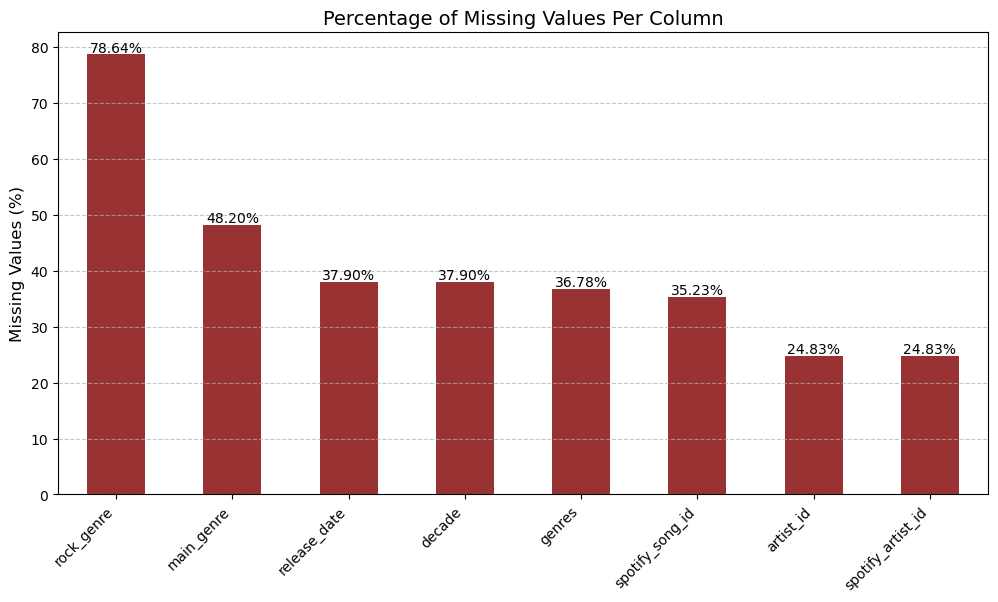

In [16]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Filter out columns with no missing values
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(12, 6))
missing_percentage.sort_values(ascending=False).plot(kind="bar", color="maroon", alpha=0.8)

plt.title("Percentage of Missing Values Per Column", fontsize=14)
plt.ylabel("Missing Values (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on top of bars
for index, value in enumerate(missing_percentage.sort_values(ascending=False)):
    plt.text(index, value + 0.5, f"{value:.2f}%", ha="center", fontsize=10)

plt.show()

In [17]:
unwanted_columns = ['rock_genre', 'spotify_song_id', 'spotify_artist_id', 'decade']
df_cleaned = df.drop(columns=unwanted_columns)

df = df.drop(columns=unwanted_columns)

In [18]:
df.head()

,id,chords,release_date,genres,artist_id,main_genre
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,NaN,'classic country pop',artist_1,pop
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,2003-01-01,'alternative metal' 'alternative rock' 'nu met...,artist_2,metal
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,2003-01-01,'alternative metal' 'canadian rock' 'funk meta...,artist_3,metal
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,2022-09-23,NaN,artist_4,NaN
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,2023-02-10,'modern country pop',artist_5,pop


In [19]:
df.columns

Index(['id', 'chords', 'release_date', 'genres', 'artist_id', 'main_genre'], dtype='object')

In [20]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_decade'] = (df['release_year'] // 10) * 10

In [21]:
df['release_date'].dtype

dtype('<M8[ns]')

In [22]:
df['release_date'].head()

0          NaT
1   2003-01-01
2   2003-01-01
3   2022-09-23
4   2023-02-10
Name: release_date, dtype: datetime64[ns]

In [23]:
print("Data type:", df['release_date'].dtype)
print("Number of non-null dates:", df['release_date'].notnull().sum())
print("Earliest date:", df['release_date'].min())
print("Latest date:", df['release_date'].max())
print("Missing values:", df['release_date'].isna().sum())

Data type: datetime64[ns]
Number of non-null dates: 382936
Earliest date: 1899-12-31 00:00:00
Latest date: 2023-11-18 00:00:00
Missing values: 296871


In [24]:
df.head()

,id,chords,release_date,genres,artist_id,main_genre,release_year,release_decade
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,NaT,'classic country pop',artist_1,pop,NaN,NaN
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,2003-01-01,'alternative metal' 'alternative rock' 'nu met...,artist_2,metal,2003.0,2000.0
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,2003-01-01,'alternative metal' 'canadian rock' 'funk meta...,artist_3,metal,2003.0,2000.0
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,2022-09-23,NaN,artist_4,NaN,2022.0,2020.0
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,2023-02-10,'modern country pop',artist_5,pop,2023.0,2020.0


In [25]:
import re

In [26]:
def clean_chords(text):
    text = re.sub(r"<.*?>", "", str(text))
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['cleaned_chords'] = df['chords'].apply(clean_chords)

In [27]:
df['chord_tokens'] = df['cleaned_chords'].apply(lambda x: x.split(" ") if x else [])

In [28]:
from pychord import Chord

# Step 1: Get all unique chords
from itertools import chain
unique_chords = set(chain.from_iterable(df['chord_tokens']))

# Step 2: Normalize them using pychord once
normalized_dict = {}
for chord in unique_chords:
    try:
        normalized_dict[chord] = Chord(chord.strip()).symbol
    except:
        normalized_dict[chord] = chord.strip()

# Step 3: Map back to full dataset using the dictionary
def normalize_chord_list(chord_list):
    return [normalized_dict.get(c, c) for c in chord_list]

df['normalized_chords'] = df['chord_tokens'].apply(normalize_chord_list)

In [29]:
def to_mirex_format(chord):
    if '/' in chord:
        base, bass = chord.split('/')
        if ':' not in base:
            return f"{base}:maj/{bass}"
        return f"{base}/{bass}"
    if chord.endswith('m') and not chord.endswith('maj') and not chord.endswith('min'):
        return chord.replace('m', ':min')
    elif chord.endswith('7'):
        return chord.replace('7', ':7')
    elif 'maj' in chord:
        return chord.replace('maj', ':maj')
    return f"{chord}:maj"

df['mirex_chords'] = df['normalized_chords'].apply(lambda chords: [to_mirex_format(c) for c in chords])

In [30]:
df.head()

,id,chords,release_date,genres,artist_id,main_genre,release_year,release_decade,cleaned_chords,chord_tokens,normalized_chords,mirex_chords
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,NaT,'classic country pop',artist_1,pop,NaN,NaN,C F C E7 Amin C F C G7 C F C E7 Amin C F G7 C ...,"[C, F, C, E7, Amin, C, F, C, G7, C, F, C, E7, ...","[C, F, C, E7, Amin, C, F, C, G7, C, F, C, E7, ...","[C:maj, F:maj, C:maj, E:7, Amin:maj, C:maj, F:..."
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,2003-01-01,'alternative metal' 'alternative rock' 'nu met...,artist_2,metal,2003.0,2000.0,E D A/Cs E D A/Cs E D A/Cs E D A/Cs E D A/Cs E...,"[E, D, A/Cs, E, D, A/Cs, E, D, A/Cs, E, D, A/C...","[E, D, A/Cs, E, D, A/Cs, E, D, A/Cs, E, D, A/C...","[E:maj, D:maj, A:maj/Cs, E:maj, D:maj, A:maj/C..."
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,2003-01-01,'alternative metal' 'canadian rock' 'funk meta...,artist_3,metal,2003.0,2000.0,Csmin A Csmin A Csmin A Csmin A B Csmin A Fsmi...,"[Csmin, A, Csmin, A, Csmin, A, Csmin, A, B, Cs...","[Csmin, A, Csmin, A, Csmin, A, Csmin, A, B, Cs...","[Csmin:maj, A:maj, Csmin:maj, A:maj, Csmin:maj..."
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,2022-09-23,NaN,artist_4,NaN,2022.0,2020.0,D Dmaj7 D Dmaj7 Emin A D G Emin A D G Emin A D...,"[D, Dmaj7, D, Dmaj7, Emin, A, D, G, Emin, A, D...","[D, Dmaj7, D, Dmaj7, Emin, A, D, G, Emin, A, D...","[D:maj, Dmaj:7, D:maj, Dmaj:7, Emin:maj, A:maj..."
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,2023-02-10,'modern country pop',artist_5,pop,2023.0,2020.0,C G C G C F Dmin G Dmin G C G C F Dmin G Dmin ...,"[C, G, C, G, C, F, Dmin, G, Dmin, G, C, G, C, ...","[C, G, C, G, C, F, Dmin, G, Dmin, G, C, G, C, ...","[C:maj, G:maj, C:maj, G:maj, C:maj, F:maj, Dmi..."


In [31]:
df.isnull().sum()

id                        0
chords                    0
release_date         296871
genres               250054
artist_id            168821
main_genre           327696
release_year         296871
release_decade       296871
cleaned_chords            0
chord_tokens              0
normalized_chords         0
mirex_chords              0
dtype: int64

In [32]:
df['artist_id'].head()

0    artist_1
1    artist_2
2    artist_3
3    artist_4
4    artist_5
Name: artist_id, dtype: object

In [33]:
df = df.drop(columns=['artist_id'])

In [34]:
df.head()

,id,chords,release_date,genres,main_genre,release_year,release_decade,cleaned_chords,chord_tokens,normalized_chords,mirex_chords
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,NaT,'classic country pop',pop,NaN,NaN,C F C E7 Amin C F C G7 C F C E7 Amin C F G7 C ...,"[C, F, C, E7, Amin, C, F, C, G7, C, F, C, E7, ...","[C, F, C, E7, Amin, C, F, C, G7, C, F, C, E7, ...","[C:maj, F:maj, C:maj, E:7, Amin:maj, C:maj, F:..."
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,2003-01-01,'alternative metal' 'alternative rock' 'nu met...,metal,2003.0,2000.0,E D A/Cs E D A/Cs E D A/Cs E D A/Cs E D A/Cs E...,"[E, D, A/Cs, E, D, A/Cs, E, D, A/Cs, E, D, A/C...","[E, D, A/Cs, E, D, A/Cs, E, D, A/Cs, E, D, A/C...","[E:maj, D:maj, A:maj/Cs, E:maj, D:maj, A:maj/C..."
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,2003-01-01,'alternative metal' 'canadian rock' 'funk meta...,metal,2003.0,2000.0,Csmin A Csmin A Csmin A Csmin A B Csmin A Fsmi...,"[Csmin, A, Csmin, A, Csmin, A, Csmin, A, B, Cs...","[Csmin, A, Csmin, A, Csmin, A, Csmin, A, B, Cs...","[Csmin:maj, A:maj, Csmin:maj, A:maj, Csmin:maj..."
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,2022-09-23,NaN,NaN,2022.0,2020.0,D Dmaj7 D Dmaj7 Emin A D G Emin A D G Emin A D...,"[D, Dmaj7, D, Dmaj7, Emin, A, D, G, Emin, A, D...","[D, Dmaj7, D, Dmaj7, Emin, A, D, G, Emin, A, D...","[D:maj, Dmaj:7, D:maj, Dmaj:7, Emin:maj, A:maj..."
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,2023-02-10,'modern country pop',pop,2023.0,2020.0,C G C G C F Dmin G Dmin G C G C F Dmin G Dmin ...,"[C, G, C, G, C, F, Dmin, G, Dmin, G, C, G, C, ...","[C, G, C, G, C, F, Dmin, G, Dmin, G, C, G, C, ...","[C:maj, G:maj, C:maj, G:maj, C:maj, F:maj, Dmi..."


<Axes: >

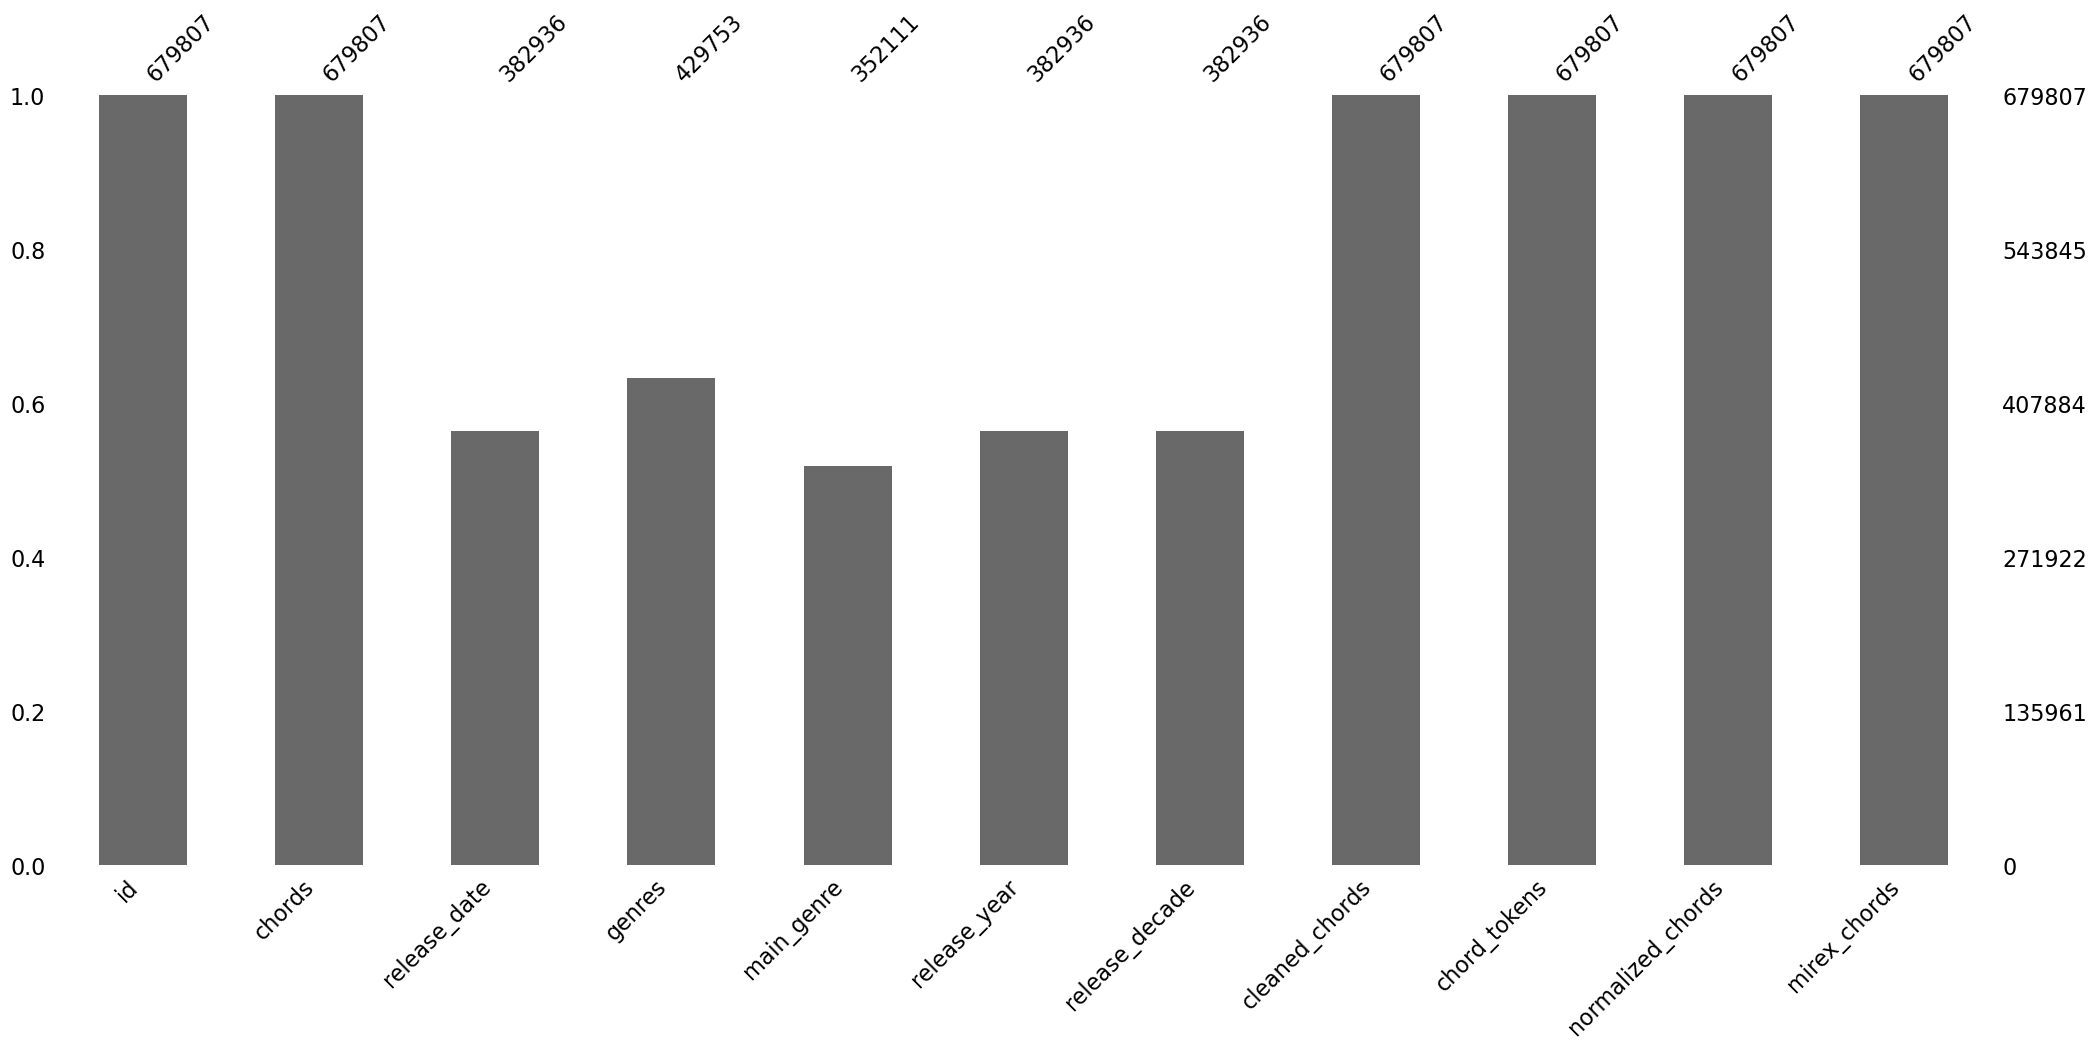

In [35]:
mno.bar(df)

In [36]:
import seaborn as sns

count    679807.000000
mean         76.484405
std          54.593482
min           1.000000
25%          47.000000
50%          71.000000
75%          97.000000
max        2549.000000
Name: seq_length, dtype: float64


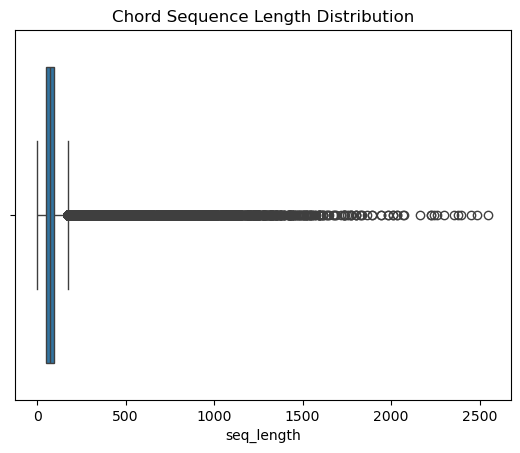

In [37]:
# Add sequence length column
df['seq_length'] = df['normalized_chords'].apply(len)

# Basic stats
print(df['seq_length'].describe())

# Plot
sns.boxplot(x=df['seq_length'])
plt.title("Chord Sequence Length Distribution")
plt.show()


In [38]:
# Define max acceptable length (adjustable)
MAX_LENGTH = 300

# Remove outliers beyond this length
df = df[df['seq_length'] <= MAX_LENGTH]

In [39]:
df['normalized_chords'] = df['normalized_chords'].apply(lambda x: x[:MAX_LENGTH])

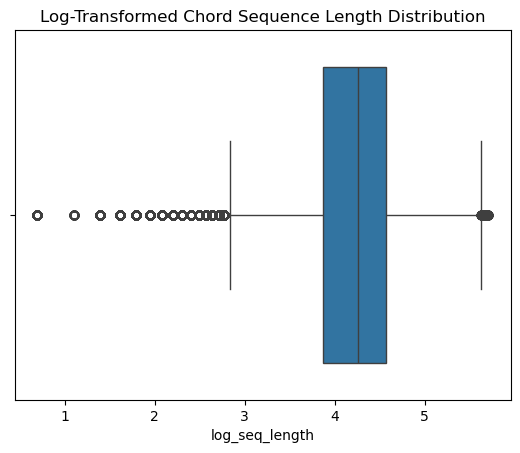

In [40]:
df['log_seq_length'] = np.log1p(df['seq_length'])  # Log transformation

sns.boxplot(x=df['log_seq_length'])
plt.title("Log-Transformed Chord Sequence Length Distribution")
plt.show()

In [41]:
from collections import Counter
from itertools import chain

all_chords = list(chain.from_iterable(df['normalized_chords']))
chord_counts = Counter(all_chords)

# Convert to DataFrame
chord_freq = pd.DataFrame(chord_counts.items(), columns=['chord', 'count']).sort_values(by='count')

# Rare chords (less than 10 uses)
rare_chords = chord_freq[chord_freq['count'] < 10]
print(rare_chords.head(20))  # Show some of the rarest chords

             chord  count
4289  Fminmaj13/Gs      1
3377   Cminmaj7/Bb      1
3380   Dsminmaj7/D      1
3382     Absus2/Db      1
3385         C7/Db      1
3393     Bbno3d/Ab      1
3418      Cno3d/Db      1
3419       Gb13/Bb      1
3420     Dadd11/Eb      1
3421      Badd9/Gb      1
3422        D13/Eb      1
3423       C7b9/Eb      1
3424    Csmin11/Gs      1
3376      Absus4/G      1
3425       Fdim9/C      1
3427        Eb11/B      1
3428    Ebadd11/Db      1
3429      Fmin11/D      1
3430    Ebmin11/Db      1
3431  Bbdimadd13/D      1


In [42]:
# Define a threshold (e.g., chords that appear < 10 times)
RARE_THRESHOLD = 10

# Identify rare chords
rare_chords = set(chord_freq[chord_freq['count'] < RARE_THRESHOLD]['chord'])

# Replace rare chords with 'UNK'
df['normalized_chords'] = df['normalized_chords'].apply(lambda chords: ['UNK' if c in rare_chords else c for c in chords])

In [43]:
genre_counts = df['main_genre'].value_counts()
print(genre_counts.tail(10))  # Least common genres


main_genre
country        53218
alternative    47156
pop rock       39395
punk           16015
metal          11269
rap            11165
soul            7337
jazz            6984
reggae          3835
electronic      2811
Name: count, dtype: int64


In [44]:
missing_values = df.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

Missing values in each column:
id                        0
chords                    0
release_date         295482
genres               249434
main_genre           326943
release_year         295482
release_decade       295482
cleaned_chords            0
chord_tokens              0
normalized_chords         0
mirex_chords              0
seq_length                0
log_seq_length            0
dtype: int64


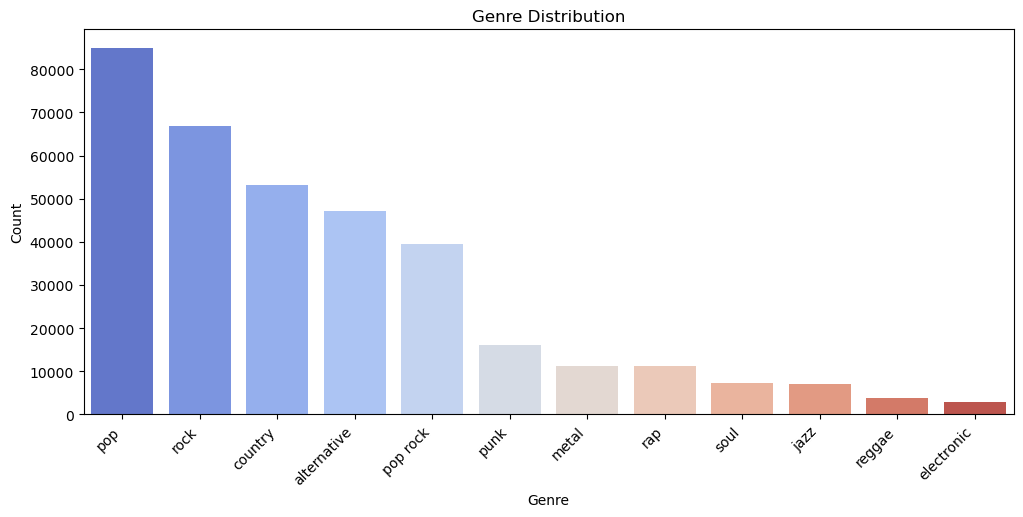

In [45]:
plt.figure(figsize=(12, 5)) 

genre_counts = df['main_genre'].value_counts()

sns.barplot(
    x=genre_counts.index,
    y=genre_counts.values,
    hue=genre_counts.index,  
    palette="coolwarm",
    dodge=False,  
    legend=False 
)

plt.xticks(rotation=45, ha="right")  
plt.title("Genre Distribution")  
plt.xlabel("Genre")  
plt.ylabel("Count")  
plt.show()

In [46]:
df.columns

Index(['id', 'chords', 'release_date', 'genres', 'main_genre', 'release_year',
       'release_decade', 'cleaned_chords', 'chord_tokens', 'normalized_chords',
       'mirex_chords', 'seq_length', 'log_seq_length'],
      dtype='object')

In [47]:
print(df[['genres', 'main_genre']].sample(10))

                                                   genres main_genre
421468                                                NaN        NaN
74598                                                 NaN        NaN
299924                                 'glam punk' 'rock'       punk
573104                                     'country rock'       rock
109515  'alternative metal' 'metal' 'progressive death...      metal
373652                                        'trop rock'       rock
652145                                                NaN        NaN
413177  'contemporary r&b' 'new jack swing' 'r&b' 'urb...       soul
463811                                        'latin pop'        pop
620950  'christian metal' 'christian power metal' 'chr...      metal


In [50]:
df['genres'].isnull().sum()

np.int64(249434)

In [52]:
if 'genres' in df.columns:
    df = df.drop(columns=['genres'])

In [53]:
df['main_genre'] = df['main_genre'].fillna('Unknown')

In [54]:
genre_counts = df['main_genre'].value_counts()
RARE_GENRE_THRESHOLD = 50
common_genres = genre_counts[genre_counts >= RARE_GENRE_THRESHOLD].index
df['main_genre'] = df['main_genre'].apply(lambda x: x if x in common_genres else 'Other')

In [55]:
df.head()

,id,chords,release_date,main_genre,release_year,release_decade,cleaned_chords,chord_tokens,normalized_chords,mirex_chords,seq_length,log_seq_length
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,NaT,pop,NaN,NaN,C F C E7 Amin C F C G7 C F C E7 Amin C F G7 C ...,"[C, F, C, E7, Amin, C, F, C, G7, C, F, C, E7, ...","[C, F, C, E7, Amin, C, F, C, G7, C, F, C, E7, ...","[C:maj, F:maj, C:maj, E:7, Amin:maj, C:maj, F:...",67,4.219508
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,2003-01-01,metal,2003.0,2000.0,E D A/Cs E D A/Cs E D A/Cs E D A/Cs E D A/Cs E...,"[E, D, A/Cs, E, D, A/Cs, E, D, A/Cs, E, D, A/C...","[E, D, A/Cs, E, D, A/Cs, E, D, A/Cs, E, D, A/C...","[E:maj, D:maj, A:maj/Cs, E:maj, D:maj, A:maj/C...",122,4.812184
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,2003-01-01,metal,2003.0,2000.0,Csmin A Csmin A Csmin A Csmin A B Csmin A Fsmi...,"[Csmin, A, Csmin, A, Csmin, A, Csmin, A, B, Cs...","[Csmin, A, Csmin, A, Csmin, A, Csmin, A, B, Cs...","[Csmin:maj, A:maj, Csmin:maj, A:maj, Csmin:maj...",56,4.043051
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,2022-09-23,Unknown,2022.0,2020.0,D Dmaj7 D Dmaj7 Emin A D G Emin A D G Emin A D...,"[D, Dmaj7, D, Dmaj7, Emin, A, D, G, Emin, A, D...","[D, Dmaj7, D, Dmaj7, Emin, A, D, G, Emin, A, D...","[D:maj, Dmaj:7, D:maj, Dmaj:7, Emin:maj, A:maj...",138,4.934474
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,2023-02-10,pop,2023.0,2020.0,C G C G C F Dmin G Dmin G C G C F Dmin G Dmin ...,"[C, G, C, G, C, F, Dmin, G, Dmin, G, C, G, C, ...","[C, G, C, G, C, F, Dmin, G, Dmin, G, C, G, C, ...","[C:maj, G:maj, C:maj, G:maj, C:maj, F:maj, Dmi...",39,3.688879


In [56]:
df.columns

Index(['id', 'chords', 'release_date', 'main_genre', 'release_year',
       'release_decade', 'cleaned_chords', 'chord_tokens', 'normalized_chords',
       'mirex_chords', 'seq_length', 'log_seq_length'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['main_genre'])

genre_encoding_map = dict(zip(le.classes_, le.transform(le.classes_)))
genre_map_df = pd.DataFrame(list(genre_encoding_map.items()), columns=['Genre', 'Encoded Label'])


In [60]:
df.head()

,id,chords,release_date,main_genre,release_year,release_decade,cleaned_chords,chord_tokens,normalized_chords,mirex_chords,seq_length,log_seq_length,genre_encoded
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,NaT,pop,NaN,NaN,C F C E7 Amin C F C G7 C F C E7 Amin C F G7 C ...,"[C, F, C, E7, Amin, C, F, C, G7, C, F, C, E7, ...","[C, F, C, E7, Amin, C, F, C, G7, C, F, C, E7, ...","[C:maj, F:maj, C:maj, E:7, Amin:maj, C:maj, F:...",67,4.219508,6
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,2003-01-01,metal,2003.0,2000.0,E D A/Cs E D A/Cs E D A/Cs E D A/Cs E D A/Cs E...,"[E, D, A/Cs, E, D, A/Cs, E, D, A/Cs, E, D, A/C...","[E, D, A/Cs, E, D, A/Cs, E, D, A/Cs, E, D, A/C...","[E:maj, D:maj, A:maj/Cs, E:maj, D:maj, A:maj/C...",122,4.812184,5
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,2003-01-01,metal,2003.0,2000.0,Csmin A Csmin A Csmin A Csmin A B Csmin A Fsmi...,"[Csmin, A, Csmin, A, Csmin, A, Csmin, A, B, Cs...","[Csmin, A, Csmin, A, Csmin, A, Csmin, A, B, Cs...","[Csmin:maj, A:maj, Csmin:maj, A:maj, Csmin:maj...",56,4.043051,5
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,2022-09-23,Unknown,2022.0,2020.0,D Dmaj7 D Dmaj7 Emin A D G Emin A D G Emin A D...,"[D, Dmaj7, D, Dmaj7, Emin, A, D, G, Emin, A, D...","[D, Dmaj7, D, Dmaj7, Emin, A, D, G, Emin, A, D...","[D:maj, Dmaj:7, D:maj, Dmaj:7, Emin:maj, A:maj...",138,4.934474,0
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,2023-02-10,pop,2023.0,2020.0,C G C G C F Dmin G Dmin G C G C F Dmin G Dmin ...,"[C, G, C, G, C, F, Dmin, G, Dmin, G, C, G, C, ...","[C, G, C, G, C, F, Dmin, G, Dmin, G, C, G, C, ...","[C:maj, G:maj, C:maj, G:maj, C:maj, F:maj, Dmi...",39,3.688879,6


<Axes: >

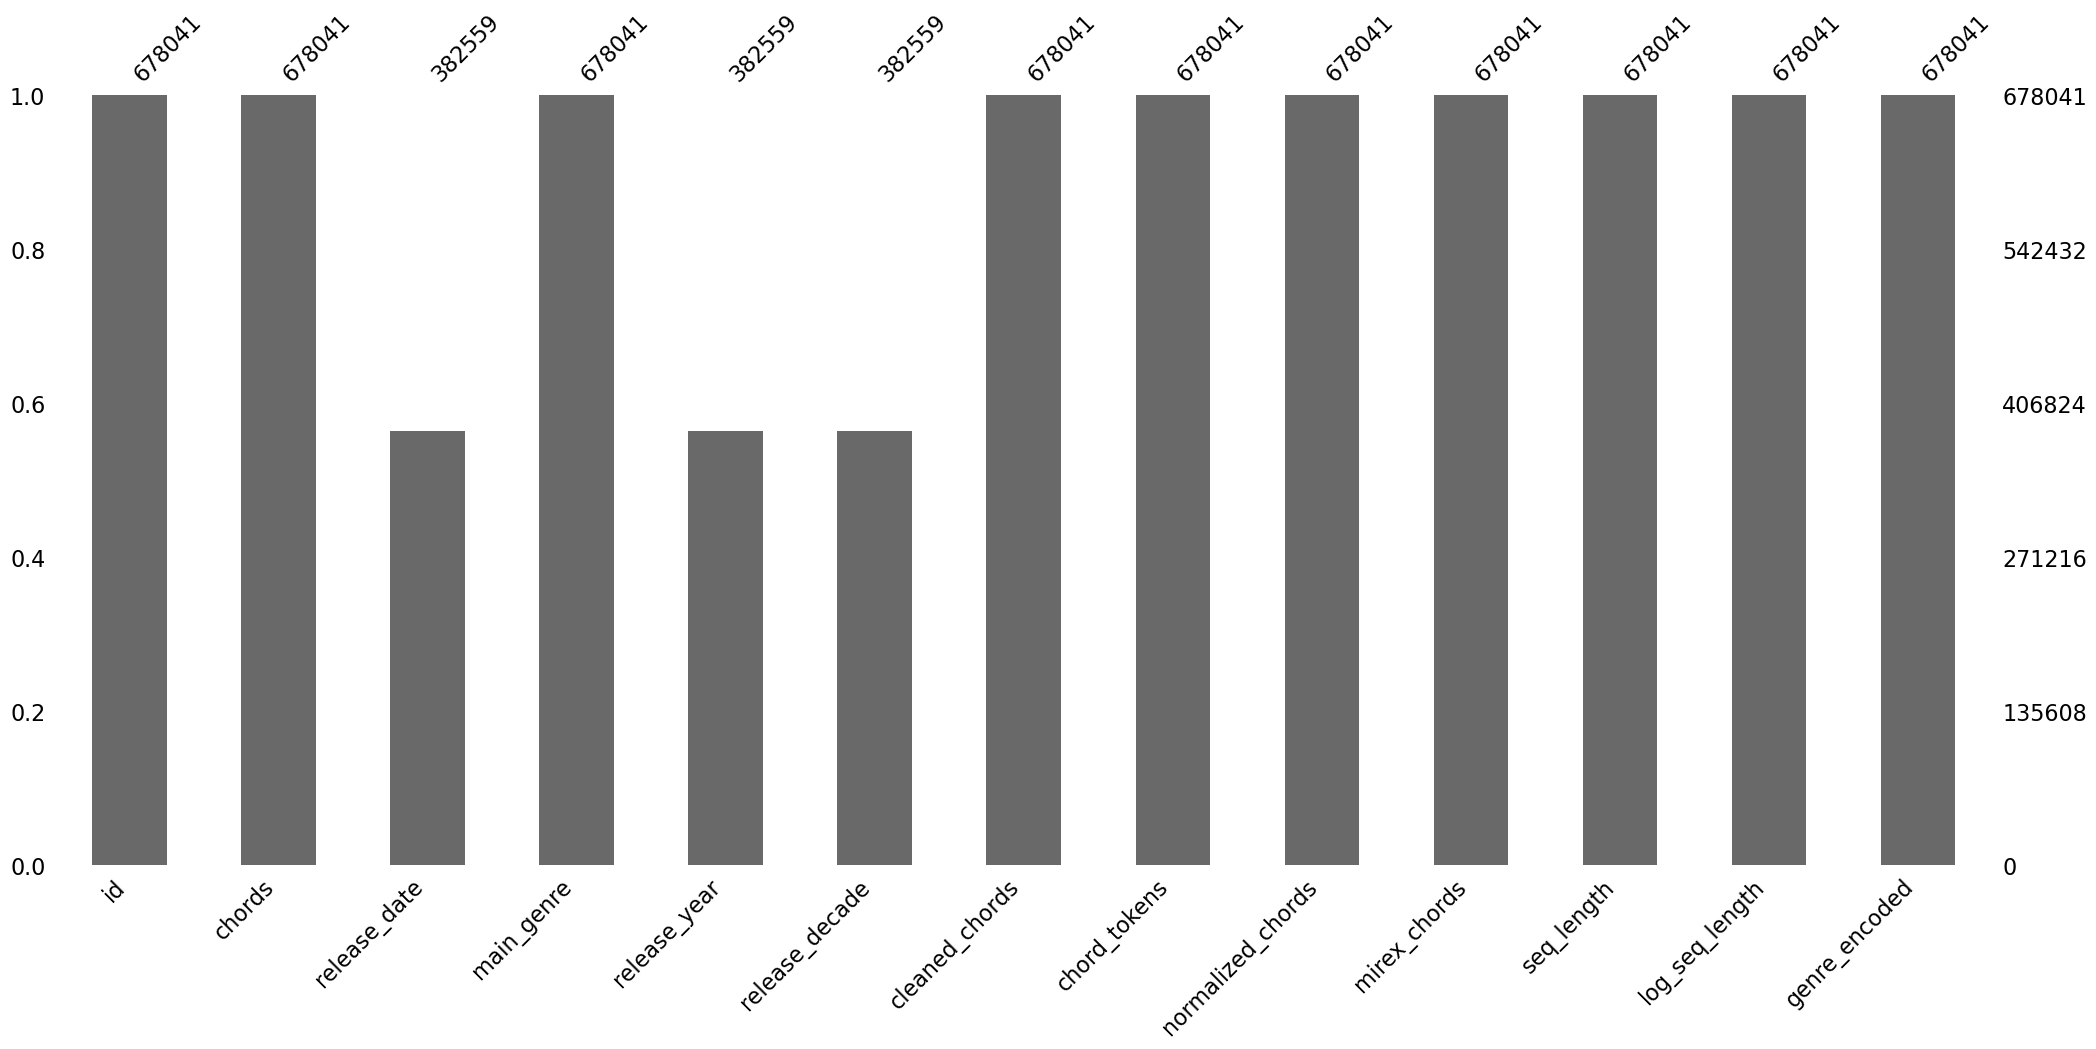

In [61]:
mno.bar(df)

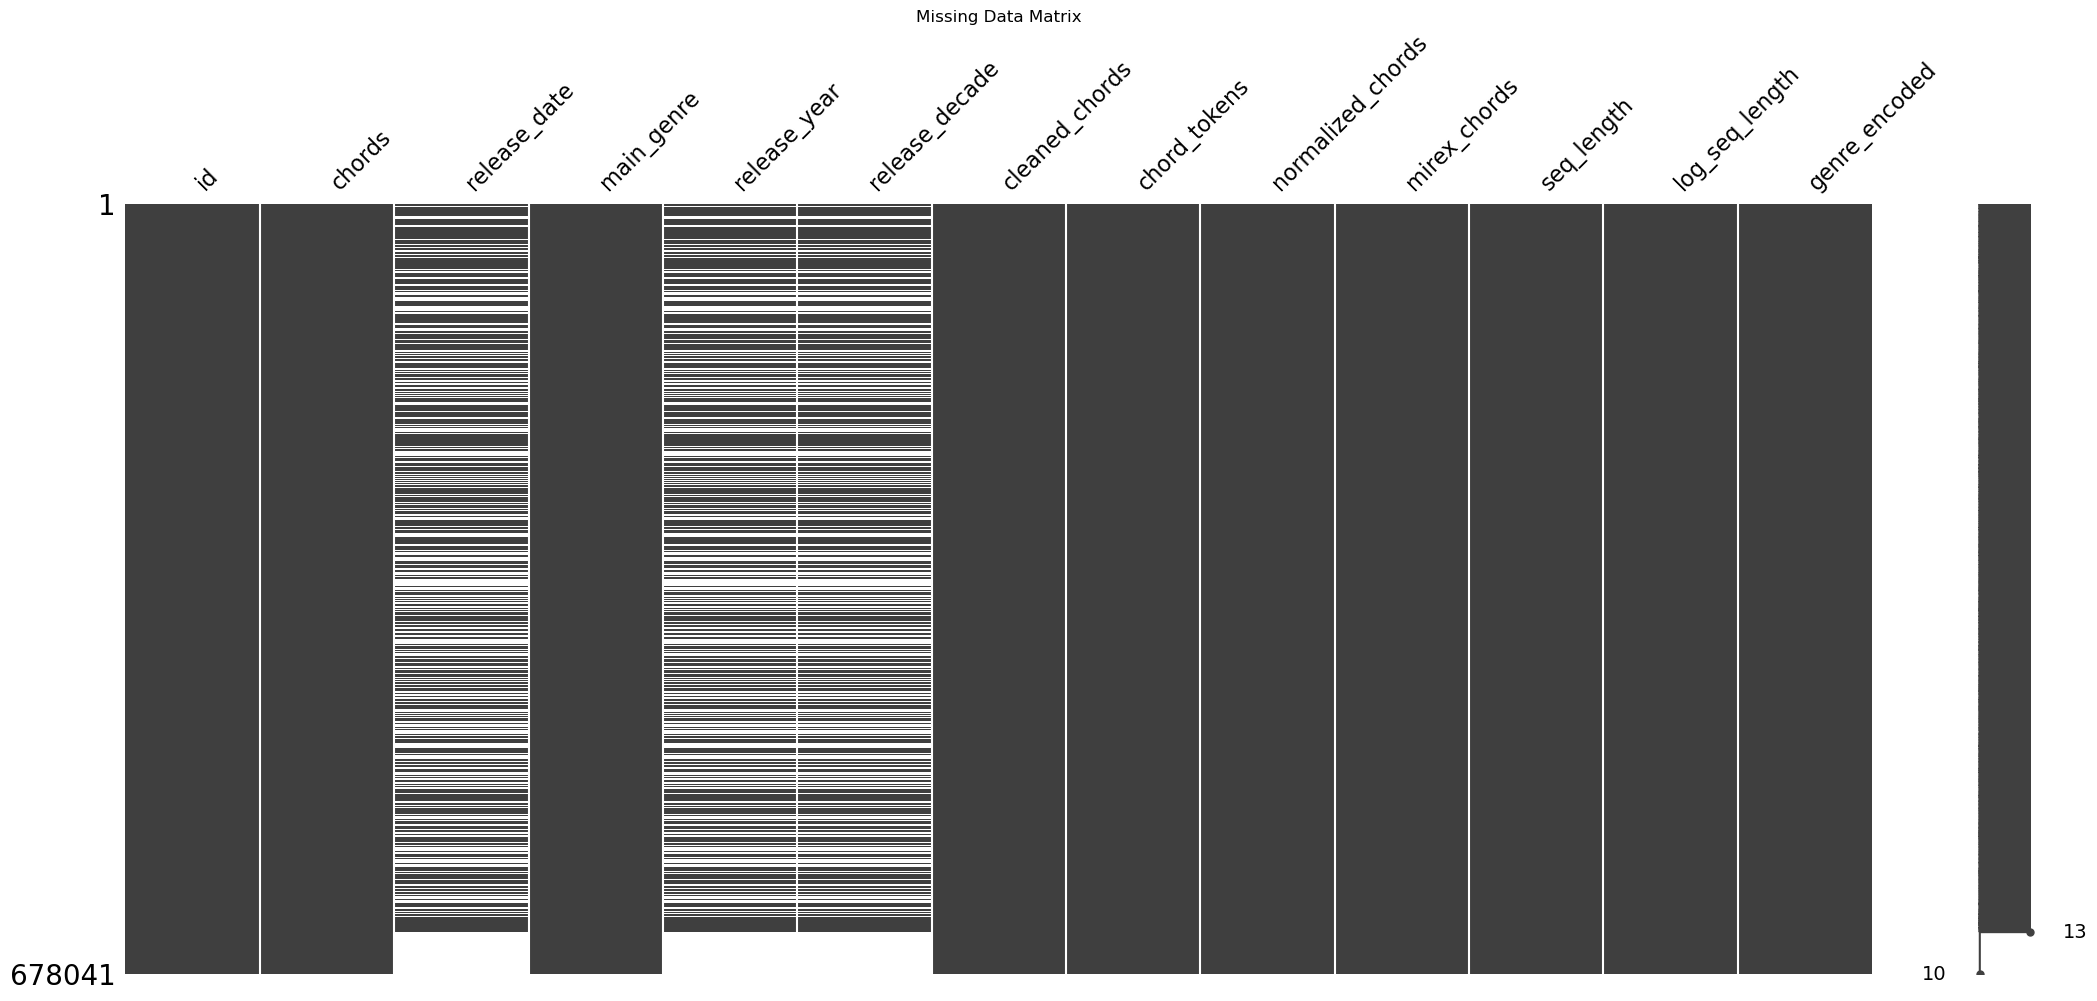

In [62]:
mno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()


In [64]:
df.columns

Index(['id', 'chords', 'release_date', 'main_genre', 'release_year',
       'release_decade', 'cleaned_chords', 'chord_tokens', 'normalized_chords',
       'mirex_chords', 'seq_length', 'log_seq_length', 'genre_encoded'],
      dtype='object')

In [65]:
df['release_decade'].dtype

dtype('float64')

In [67]:
median_decade = df['release_decade'].median()
print(f'Median decade: {median_decade}')

Median decade: 2010.0


In [68]:
df['release_decade'] = df['release_decade'].fillna(median_decade)

In [71]:
df['release_decade'] = df['release_decade'].astype(int)

<Axes: >

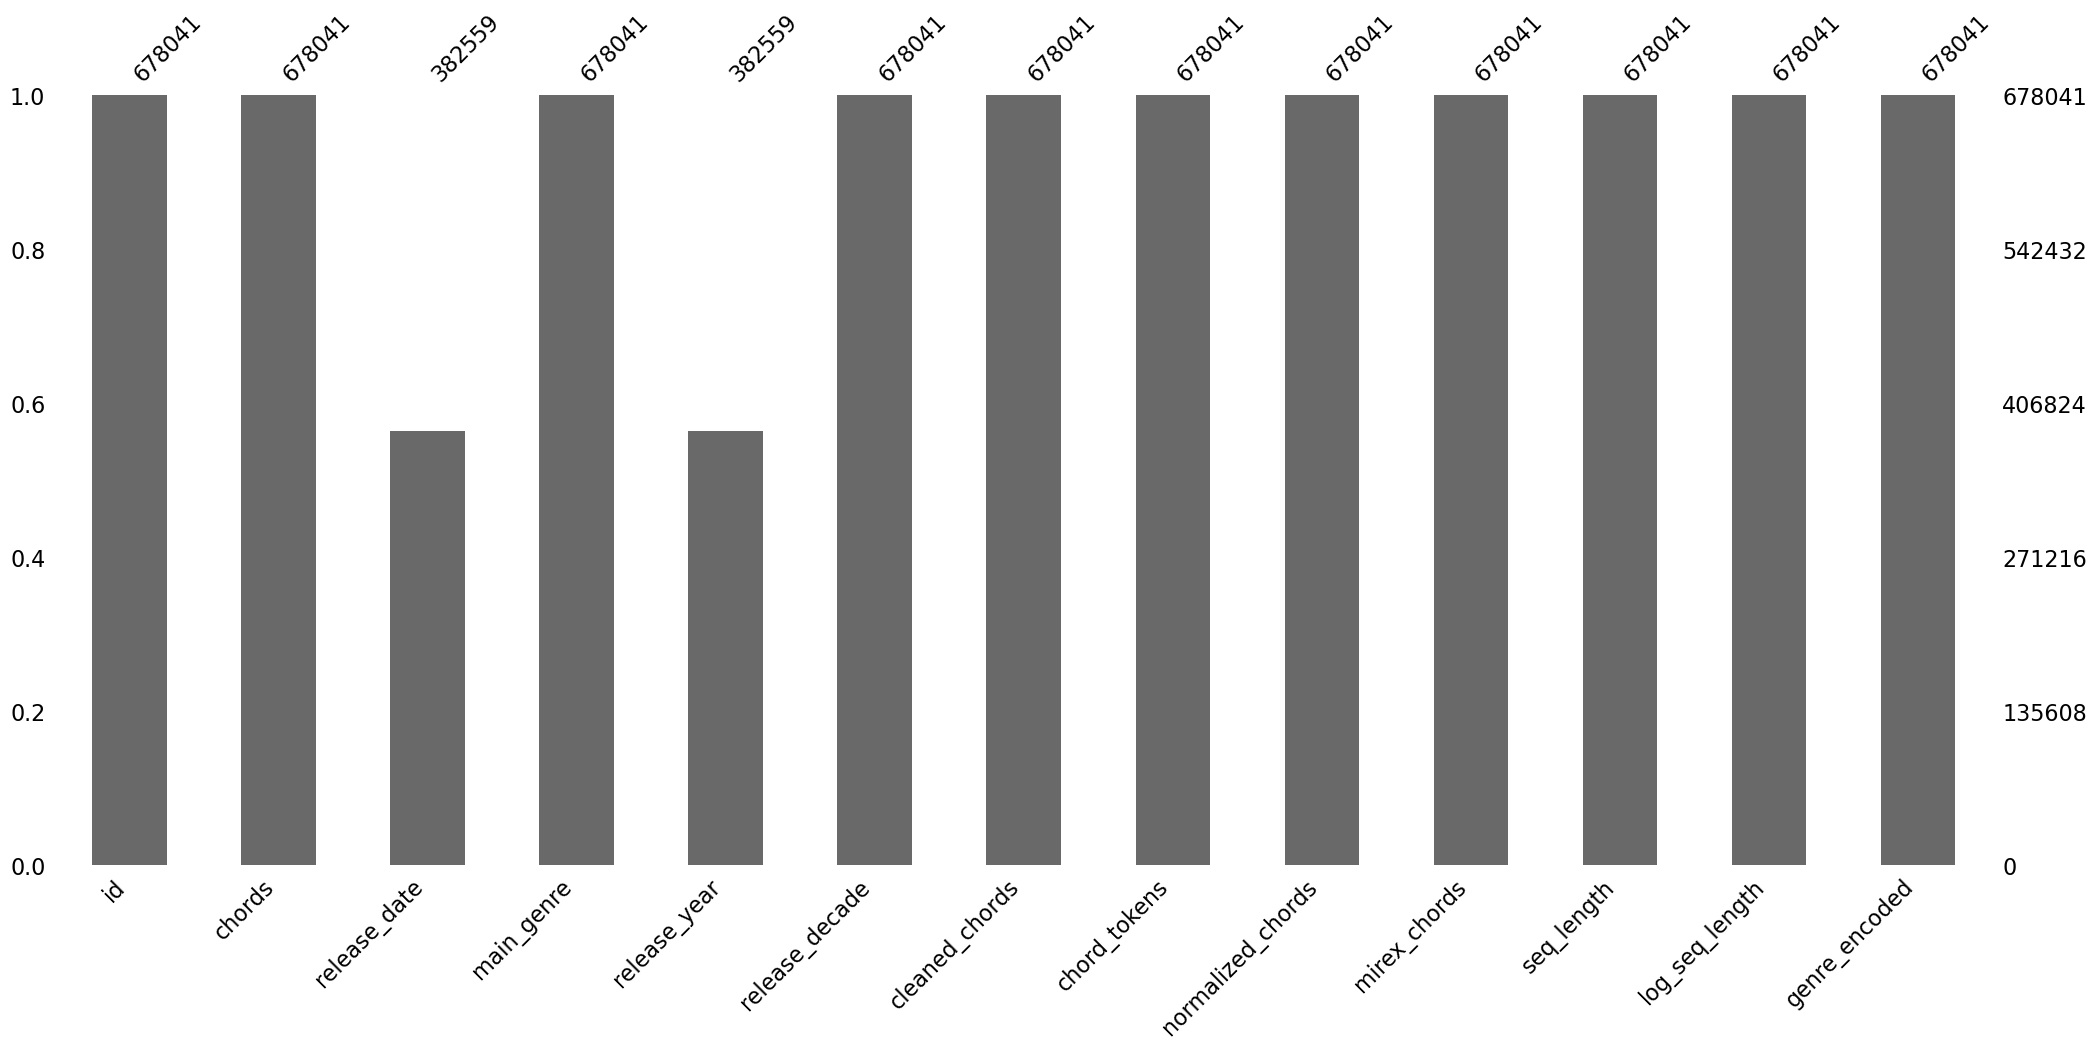

In [73]:
mno.bar(df)

In [75]:
df['release_year'].dtype

dtype('float64')